# Introduction and Business Problem

Through this project I aim to select the safest borough in Toronto based on the number of crimes, and explore the different venues located in each neighborhood that will be clustered overall using k-mean clustering.
This report will primarily target immigrants that arrive in Toronto every year in an attempt to relocate themselves and start a new life. Safety and amenities have been selected as primary goals when selecting a neighborhood and during the research I will focus on the safest borough within Toronto through examining crime statistics and explore the 10 most common venues in each neighborhood so that the best neighborhood suited to the client’s need can be selected. As a student living in Toronto, Canada, I was able to observe thousands of immigrants settle down in various places across Toronto every year. Hopefully, this project will aid individuals or families when deciding on a neighborhood to select when looking for an apartment.


# Data

### The factors that will be put into consideration for this problem are:
* The total number of crimes that have been commited in each neighbourhood during 2004 (the dataset is based on crime rates that occured in 2004)
* The most commonly sighted venues/amenities within the neighbourhood that was selected to be the safest

### The dataset will be acquired through the following steps: 
* Preprocessing the 2004 Toronto Police Homicide Data that was accessed from Kaggle
* Creating a new dataset of the selected neighbourhood in Toronto and generating their coordinates using Google Maps API Geocoding

## 1) Preprocessing the 2004 Toronto Police Data that was accessed from Kaggle

### Toronto Crime Data
Dataset URL: https://www.kaggle.com/kapastor/toronto-police-data-crime-rates-by-neighbourhood#Homicide.csv

### Import Library

In [5]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation
from bs4 import BeautifulSoup # library for web scrapping  

!conda install -c conda-forge geocoder --yes
import geocoder

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geocoder


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ratelim-0.1.6              |             py_2           6 KB  conda-forge
    geocoder-1.38.1            |             py_1          53 KB  conda-forge
    certifi-2019.11.28         |           py36_0         149 KB  conda-forge
    ca-certificates-2019.11.28 |       hecc5488_0         145 KB  conda-forge
    openssl-1.1.1d             |       h516909a_0         2.1 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.4 MB

The following NEW packages will be INSTALLED:

    geocoder:        1.38.1-py_1       conda-forge
    ratelim:         0.1.6-py_2        conda-forge

The following packages will be UPDATED:

    

### Foursquare Credentials and Version

In [6]:
CLIENT_ID = 'HXIBWOANQDBBQC0150ROZJ2PCJVVKTIM3CLWACXH3XQOY1PU' 
CLIENT_SECRET = '4JT1TWRMXMPLX5IOKNBAFU3L3ARXK4D5JJDPFK1CLRZM2ZVW'

VERSION = '20200108'
LIMIT = 30

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: HXIBWOANQDBBQC0150ROZJ2PCJVVKTIM3CLWACXH3XQOY1PU
CLIENT_SECRET:4JT1TWRMXMPLX5IOKNBAFU3L3ARXK4D5JJDPFK1CLRZM2ZVW


### Read dataset / Access crime rates / Change column names

In [9]:
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_1f3fc1f595cb4420a4bc60476d0ef988 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='83Xa6unEq_-5g8_qivH9TDBOeYu2Z_TC9OL5QDP4ce77',
    ibm_auth_endpoint="https://iam.ng.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_1f3fc1f595cb4420a4bc60476d0ef988.get_object(Bucket='datascience-donotdelete-pr-ahffziv0kkkzu1',Key='Homicide.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

# If you are reading an Excel file into a pandas DataFrame, replace `read_csv` by `read_excel` in the next statement.
df = pd.read_csv(body)
df.head()


,X,Y,Index_,Event_Unique_ID,Occurrence_year,Division,Homicide_Type,Occurrence_Date,Hood_ID,Neighbourhood,Lat,Long,ObjectId
0,-79.392853,43.685028,1,111878,2004,D53,Other,2004-01-03T05:00:00.000Z,98,Rosedale-Moore Park (98),43.685028,-79.392853,1
1,-79.234962,43.781536,2,125755,2004,D42,Shooting,2004-01-08T05:00:00.000Z,137,Woburn (137),43.781536,-79.234962,2
2,-79.206894,43.810860,3,136086,2004,D42,Shooting,2004-01-08T05:00:00.000Z,132,Malvern (132),43.810860,-79.206894,3
3,-79.434403,43.670475,4,148623,2004,D13,Shooting,2004-01-25T05:00:00.000Z,93,Dovercourt-Wallace Emerson-Junction (93),43.670475,-79.434403,4
4,-79.203865,43.823543,5,148619,2004,D42,Shooting,2004-01-25T05:00:00.000Z,131,Rouge (131),43.823543,-79.203865,5


In [22]:
# Drop unnecessary columns
df.drop(['Index_','Occurrence_Date','Lat','Long','ObjectId'], axis=1, inplace = True)

# Reset the index and dropping the previous index
df = df.reset_index(drop=True)

# Shape of the data frame
df.shape

KeyError: "['Index_' 'Occurrence_Date' 'Lat' 'Long' 'ObjectId'] not found in axis"

In [23]:
df.head()

,Event_Unique_ID,Occurrence_year,Division,Homicide_Type,Hood_ID,Neighbourhood
0,111878,2004,D53,Other,98,Rosedale-Moore Park (98)
1,125755,2004,D42,Shooting,137,Woburn (137)
2,136086,2004,D42,Shooting,132,Malvern (132)
3,148623,2004,D13,Shooting,93,Dovercourt-Wallace Emerson-Junction (93)
4,148619,2004,D42,Shooting,131,Rouge (131)


In [24]:
df.columns = ['Crime_Number','Year','Division','Crime_Type','Hood_ID','Neighbourhood']
df.head()

,Crime_Number,Year,Division,Crime_Type,Hood_ID,Neighbourhood
0,111878,2004,D53,Other,98,Rosedale-Moore Park (98)
1,125755,2004,D42,Shooting,137,Woburn (137)
2,136086,2004,D42,Shooting,132,Malvern (132)
3,148623,2004,D13,Shooting,93,Dovercourt-Wallace Emerson-Junction (93)
4,148619,2004,D42,Shooting,131,Rouge (131)


### Total number of crimes in each Neighbourhood

In [25]:
df['Neighbourhood'].value_counts()

Mount Olive-Silverstone-Jamestown (2)       29
Glenfield-Jane Heights (25)                 27
Moss Park (73)                              26
Malvern (132)                               25
Rouge (131)                                 24
Black Creek (24)                            23
Church-Yonge Corridor (75)                  23
Downsview-Roding-CFB (26)                   20
Woburn (137)                                20
Dovercourt-Wallace Emerson-Junction (93)    19
Regent Park (72)                            18
South Riverdale (70)                        18
Kensington-Chinatown (78)                   16
Clairlea-Birchmount (120)                   16
Humber Summit (21)                          15
Willowdale East (51)                        15
Wexford/Maryvale (119)                      15
Scarborough Village (139)                   14
Danforth (66)                               14
Weston (113)                                14
Kingsview Village-The Westway (6)           14
L'Amoreaux (1

### Total crimes per Crime Type

In [26]:
df['Crime_Type'].value_counts()

Shooting    526
Other       263
Stabbing    226
Name: Crime_Type, dtype: int64

### Pivot table of crimes for each neighbourhood in Toronto

In [34]:
df['No_of_Crime'] = pd.Series([1 for x in range(len(df.index))], index=df.index)
df.head()

,Crime_Number,Year,Division,Crime_Type,Hood_ID,Neighbourhood,No_of_Crime
0,111878,2004,D53,Other,98,Rosedale-Moore Park (98),1
1,125755,2004,D42,Shooting,137,Woburn (137),1
2,136086,2004,D42,Shooting,132,Malvern (132),1
3,148623,2004,D13,Shooting,93,Dovercourt-Wallace Emerson-Junction (93),1
4,148619,2004,D42,Shooting,131,Rouge (131),1


In [41]:
Toronto_crime = pd.pivot_table(df,values=['No_of_Crime'],
                               index=['Neighbourhood'],
                               columns=['Crime_Type'],
                               aggfunc=np.sum,fill_value=0)
Toronto_crime.head()

No_of_Crime                  
Crime_Type                               Other Shooting Stabbing
Neighbourhood                                                   
Agincourt North (129)                        3        1        1
Agincourt South-Malvern West (128)           1        5        1
Alderwood (20)                               0        5        1
Annex (95)                                   1        3        4
Banbury-Don Mills (42)                       1        3        2

In [42]:
# Reset the index
Toronto_crime.reset_index(inplace = True)
# Total crimes per Neighbourhood
Toronto_crime['Total'] = Toronto_crime.sum(axis=1)
Toronto_crime.head(50)

Neighbourhood No_of_Crime           \
Crime_Type                                                 Other Shooting   
0                              Agincourt North (129)           3        1   
1                 Agincourt South-Malvern West (128)           1        5   
2                                     Alderwood (20)           0        5   
3                                         Annex (95)           1        3   
4                             Banbury-Don Mills (42)           1        3   
5                                Bathurst Manor (34)           2        0   
6                           Bay Street Corridor (76)           0        6   
7                               Bayview Village (52)           0        1   
8                         Bayview Woods-Steeles (49)           0        1   
9                          Bedford Park-Nortown (39)           2        0   
10                     Beechborough-Greenbrook (112)           1        6   
11                                     Bendale (127)           1        4   
12                       Birchcliffe-Cliffside (122)           1        1   
13                                  Black Creek (24)           1       19   
14                                  Blake-Jones (69)           1        1   
15                        Briar Hill-Belgravia (108)           1        4   
16                              Broadview North (57)           0        0   
17                          Brookhaven-Amesbury (30)           2        1   
18              Cabbagetown-South St.James Town (71)           2        8   
19                          Caledonia-Fairbank (109)           1        0   
20                                    Casa Loma (96)           1        0   
21                      Centennial Scarborough (133)           2        1   
22                        Church-Yonge Corridor (75)           8       11   
23                         Clairlea-Birchmount (120)           8        7   
24                                 Clanton Park (33)           1        2   
25                                  Cliffcrest (123)           1        1   
26                       Corso Italia-Davenport (92)           2        0   
27                                     Danforth (66)           2        8   
28                           Don Valley Village (47)           3        2   
29                                 Dorset Park (126)           2        5   
30          Dovercourt-Wallace Emerson-Junction (93)           9        5   
31                         Downsview-Roding-CFB (26)           1       11   
32                               Dufferin Grove (83)           0        1   
33                            East End-Danforth (62)           1        6   
34                               Eglinton East (138)           1        5   
35                              Elms-Old Rexdale (5)           1        7   
36                          Englemount-Lawrence (32)           0        5   
37               Eringate-Centennial-West Deane (11)           1        2   
38                          Etobicoke West Mall (13)           0        1   
39                              Flemingdon Park (44)           1        6   
40                           Forest Hill North (102)           2        0   
41                       Glenfield-Jane Heights (25)           3       19   
42                            Greenwood-Coxwell (65)           2        1   
43                                   Henry Farm (53)           0        1   
44                              High Park North (88)           2        0   
45                            High Park-Swansea (87)           1        1   
46                              Highland Creek (134)           1        3   
47                            Hillcrest Village (48)           1        1   
48                      Humber Heights-Westmount (8)           0        7   
49                                Humber Summit (21)           1       12   

                    Total  
Crime_

In [46]:
Toronto_crime.columns = Toronto_crime.columns.map(''.join)
Toronto_crime.head()

,Neighbourhood,No_of_CrimeOther,No_of_CrimeShooting,No_of_CrimeStabbing,Total
0,Agincourt North (129),3,1,1,5
1,Agincourt South-Malvern West (128),1,5,1,7
2,Alderwood (20),0,5,1,6
3,Annex (95),1,3,4,8
4,Banbury-Don Mills (42),1,3,2,6


In [44]:
# Shape of the data set 
Toronto_crime.shape

(130, 5)

## Methodology

The methodology in this projects consists largely of 2 parts:
* Exploratory Data Analysis: Crime rates in Toronto neighbourhoods will be visualized to identify the safest neighbourhoods that will later be used to find the 10 most commmon venues
* Modelling: To help people find similar neighborhoods in the safest borough we will be clustering similar neighborhoods using K - means clustering which is a form of unsupervised machine learning algorithm that clusters data based on predefined cluster size. We will use a cluster size of 5 for this project that will cluster the 15 neighborhoods into 5 clusters. The reason to conduct a K- means clustering is to cluster neighborhoods with similar venues together so that people can shortlist the area of their interests based on the venues/amenities around each neighborhood 

## Exploratory Data Analysis

### Descriptive statistics of the data

In [48]:
Toronto_crime.describe()

,No_of_CrimeOther,No_of_CrimeShooting,No_of_CrimeStabbing,Total
count,130.000000,130.000000,130.000000,130.000000
mean,2.023077,4.046154,1.738462,7.807692
std,2.140294,4.332787,1.654469,6.277925
min,0.000000,0.000000,0.000000,1.000000
25%,1.000000,1.000000,0.250000,3.000000
50%,1.000000,2.000000,1.000000,6.000000
75%,2.000000,6.000000,3.000000,11.750000
max,11.000000,21.000000,8.000000,29.000000


In [49]:
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

Matplotlib version:  3.0.2


### Sort the table in Descending order for total number of crimes

In [51]:
Toronto_crime.sort_values(['Total'], ascending = False, axis = 0, inplace = True )

df_top5 = Toronto_crime.head() 
df_top5

,Neighbourhood,No_of_CrimeOther,No_of_CrimeShooting,No_of_CrimeStabbing,Total
74,Mount Olive-Silverstone-Jamestown (2),3,21,5,29
41,Glenfield-Jane Heights (25),3,19,5,27
72,Moss Park (73),11,11,4,26
66,Malvern (132),9,16,0,25
97,Rouge (131),2,18,4,24


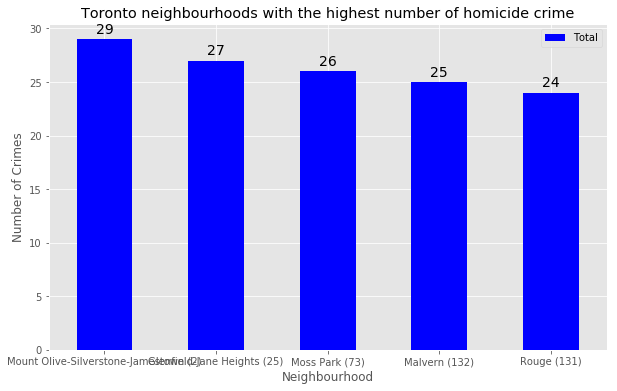

In [53]:
df_tt = df_top5[['Neighbourhood','Total']]

df_tt.set_index('Neighbourhood',inplace = True)

ax = df_tt.plot(kind='bar',color = 'blue', figsize=(10, 6), rot=0)

ax.set_ylabel('Number of Crimes') # add to x-label to the plot
ax.set_xlabel('Neighbourhood') # add y-label to the plot
ax.set_title('Toronto neighbourhoods with the highest number of homicide crime') # add title to the plot

# Creating a function to display the percentage.

for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=2), 
                (p.get_x()+p.get_width()/2., p.get_height()), 
                ha='center', 
                va='center', 
                xytext=(0, 10), 
                textcoords='offset points',
                fontsize = 14
               )

plt.show()

### Sort the table in Ascending order for total number of crimes

In [55]:
Toronto_crime.sort_values(['Total'], ascending = True, axis = 0, inplace = True )

df_bot5 = Toronto_crime.head() 
df_bot5

,Neighbourhood,No_of_CrimeOther,No_of_CrimeShooting,No_of_CrimeStabbing,Total
59,Kingsway South (15),0,0,1,1
8,Bayview Woods-Steeles (49),0,1,0,1
127,Yonge-Eglinton (100),0,1,0,1
79,Newtonbrook West (36),0,1,0,1
69,Milliken (130),1,0,1,2


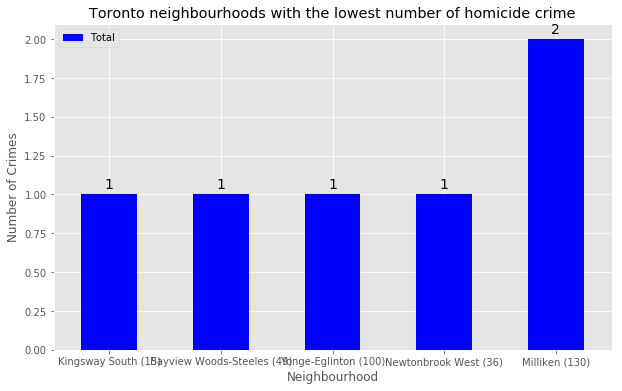

In [56]:
df_bt = df_bot5[['Neighbourhood','Total']]

df_bt.set_index('Neighbourhood',inplace = True)

ax = df_bt.plot(kind='bar', color = 'blue', figsize=(10, 6), rot=0)

ax.set_ylabel('Number of Crimes') # add to x-label to the plot
ax.set_xlabel('Neighbourhood') # add y-label to the plot
ax.set_title('Toronto neighbourhoods with the lowest number of homicide crime') # add title to the plot

# Creating a function to display the percentage.

for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=2), 
                (p.get_x()+p.get_width()/2., p.get_height()), 
                ha='center', 
                va='center', 
                xytext=(0, 10), 
                textcoords='offset points',
                fontsize = 14
               )

plt.show()

The 4 neighbourhoods - Kingsway South, Bayview Woods-Steeles, Yonge-Eglinton, Newtonbrook West - recorded the lowest number of homicide crimes in 2004. <br/>Among the 4 we will be focusing on Yonge-Eglinton

# Results and Discussion

The aim of this project was to provide information to those (immigrants) who want to relocate to the safest neighbourhood in Toronto. Through observing the 2004 homicide data provided by the Toronto police department (in Kaggle)
I was able to lead to the conclusion that Kingsway South, Bayview Woods-Steeles, Yonge-Eglinton, Newtonbrook West were the safest neighbourhoods within Toronto. Data showing results of 5 neighbourhoods with the highest crime rates have also been dealt with; Mount Olive-Silverstone-Jamestown, Glenfield-Jane, Heights, Moss, ParkMalvern and Rogue being the neighbourhoods. New immigrants arriving in Toronto will hopefully be able to
choose neighbourhoods that suit their saftey needs through these reulsts

# Conclusion

This project helps individuals and families get a better grasp at understanding Toronto neighborhoods with respect to crime rates as well as venues that are located within the neighborhood. It is always helpful to make use of technology to stay one step ahead, for instance, sufficiently examining and understanding a particular neighbourhood before moving in. Further progress of this project can be achieved by taking multiple other factors, such as cost of living in areas, into consideration in order to provide a much detailed and beneficial report to those in need.